# **Project:** Network Attack Detection

**Data set:** UNSW-NB15 Dataset

**Source of Data set:**  https://research.unsw.edu.au/projects/unsw-nb15-dataset

**Information about Data set**
> 1. Training set = 82,332 records 
2. Test set = 175,341 records
3. Features = 49 mentioned here. https://cloudstor.aarnet.edu.au/plus/apps/onlyoffice/s/2DhnLGDdEECo4ys?fileId=206777051

# What is Intrusion Detection System?

Intrusion Detection System (IDS) is a system that monitors network traffic for suspicious activity and issues alerts when such activity is discovered.

**Detection Methods of IDS:**

**1. Signature-based Method:**

It detects the attacks on the basis of the

> 1.1. specific patterns such as number of bytes/ number of 1’s or number of 0’s in the network traffic. 

> 1.2. Known malicious instruction sequence that is used by the malware.

**2. Anomaly-detection Method:**

It detects the attacks using

> 2.1. Machine learning. It creates a trustful activity model and anything coming is compared with that model and it is declared suspicious if it is not found in model 

**Which method is better?**

*Anomaly-detection Method* method is more accepted in comparison to signature-based IDS because the machine learning models can be trained according to the applications and hardware configurations.

















# Problem Statement

Network security is of prime importance these days. We need to protect our data and systems from attackers. A network attack attempts to gain unauthorized access to the network and take advantage of the vulnerablites of the network. 
In this project, we will predict the network attack that is happening over the network using the above mentioned dataset. 

The type of attacks investigated are: 
1. Fuzzers
2. Analysis
3. Backdoors
4. DoS
5. Exploits
6. Generic
7. Reconnaissance
8. Shellcode 
9. Worms 

In [5]:
import pandas as pd   #for dataframes
import numpy as np  #for array

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from  matplotlib import pyplot
from sklearn.preprocessing import OneHotEncoder  #for encoding of categorical columns

Reading the Dataset csv using the link of another git hub repo. 

In [6]:
# from google.colab import files
# uploaded = files.upload()

In [7]:
train = pd.read_csv('../1.RawData/UNSW_NB15_training-set.csv')
test = pd.read_csv('../1.RawData/UNSW_NB15_testing-set.csv')
combine = train.append(test)

In [8]:
combine.shape

(257673, 45)

#**Prepare the dataset**

---



# Dropping unnecessary columns

One such column is 'id', 'attack_cat'

In [9]:
combine = combine.drop(['id', 'attack_cat'],axis=1)
combine.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,...,1,1,2,0,0,0,1,2,0,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,...,1,1,2,0,0,0,1,2,0,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,...,1,1,3,0,0,0,1,3,0,0
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,...,2,1,3,0,0,0,2,3,0,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,...,2,1,3,0,0,0,2,3,0,0


When we concatenate two DataFrames then we need to reset the index of the DataFrame. If the dataframe has a multiindex, this method can remove one or more levels. Otherwise if we don't do this, we get an error - "InvalidIndexError: Reindexing only valid with uniquely valued Index objects" 

In [10]:
combine = combine.reset_index(drop=True)

# Check for Missing Values

Since the dataset was clean, we donot have any missing values as seen below.

In [11]:
# checking for null values
combine.isnull().sum()

dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
label                0
dtype: int6

Getting name of all the columns of the dataset to see what should be the expected datatype of each column

In [12]:
combine.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')

In [13]:
# see if binary columns are really binary
for col in 'is_sm_ips_ports', 'is_ftp_login':
    print(combine[col].value_counts())
    print()

0    253995
1      3678
Name: is_sm_ips_ports, dtype: int64

0    254428
1      3219
4        16
2        10
Name: is_ftp_login, dtype: int64



The col "is_ftp_login" has wrong values like 2 and 4. It should only have binary values like 0 and 1. If the ftp session is accessed by user using correct username and password then 1, otherwise 0. We need to fix this.

Therefore, we are replacing all the values other than 0 and 1 from these two columns.

In [14]:
combine['is_ftp_login'] = np.where(combine['is_ftp_login']>1, 1, combine['is_ftp_login'])

In [15]:
combine['is_ftp_login'].value_counts()

0    254428
1      3245
Name: is_ftp_login, dtype: int64

In [16]:
combine['service'].value_counts()

-           141321
dns          68661
http         27011
smtp          6909
ftp-data      5391
ftp           4980
pop3          1528
ssh           1506
dhcp           120
snmp           109
ssl             86
irc             30
radius          21
Name: service, dtype: int64

In the feature "service" we see that we have "-". We need to replace that as well.

In [17]:
# removing all the "-" and replacing those with "None"
combine['service'] = combine['service'].apply(lambda x:"None" if x=="-" else x)

In [18]:
combine['service'].value_counts()

None        141321
dns          68661
http         27011
smtp          6909
ftp-data      5391
ftp           4980
pop3          1528
ssh           1506
dhcp           120
snmp           109
ssl             86
irc             30
radius          21
Name: service, dtype: int64

#View the One hot encoding preprocessing file here

Since the one hot encoding created more that 150 features, there was chance of overfitting so we proceeded with Label encoding.

https://github.com/divyaKh/CMPE255Project/blob/main/1.Dataset/Dataset_and_its_Cleaning.ipynb

# Label encoding



In our dataset we have few categorical columns with text data. But when we apply ML models to our data, then we need every data to be numerical. 

So we have to convert categorical columns to numerical columns in some way. We will use label encoder where we will assign 1 if the value is present for the row and rest of the columns will be 0.

In [19]:
from sklearn.preprocessing import LabelEncoder

categorical = []
for col in combine.columns:
    if combine[col].dtype == 'object':
             categorical.append(col)

for col in categorical:
        le = LabelEncoder()
        le.fit(list(combine[col].astype(str).values) + list(combine[col].astype(str).values))
        combine[col] = le.transform(list(combine[col].astype(str).values))

combine

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.000011,119,0,5,2,0,496,0,90909.090200,254,...,1,1,2,0,0,0,1,2,0,0
1,0.000008,119,0,5,2,0,1762,0,125000.000300,254,...,1,1,2,0,0,0,1,2,0,0
2,0.000005,119,0,5,2,0,1068,0,200000.005100,254,...,1,1,3,0,0,0,1,3,0,0
3,0.000006,119,0,5,2,0,900,0,166666.660800,254,...,2,1,3,0,0,0,2,3,0,0
4,0.000010,119,0,5,2,0,2126,0,100000.002500,254,...,2,1,3,0,0,0,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000009,119,2,5,2,0,114,0,111111.107200,254,...,24,13,24,0,0,0,24,24,0,1
257669,0.505762,113,0,4,10,8,620,354,33.612649,254,...,1,1,2,0,0,0,1,1,0,1
257670,0.000009,119,2,5,2,0,114,0,111111.107200,254,...,3,3,13,0,0,0,3,12,0,1
257671,0.000009,119,2,5,2,0,114,0,111111.107200,254,...,30,14,30,0,0,0,30,30,0,1


#More EDA can be seen here: https://github.com/divyaKh/CMPE255Project/blob/main/2.EDA/Exploratory_Data_Analysis.ipynb

#**Feature importances on combined dataset**



Feature importance using Tree based classifier. 




##**CART classification**

In [20]:
from sklearn.tree import DecisionTreeClassifier

importance_dict = pd.DataFrame()

clf = DecisionTreeClassifier()
X=combine.drop(columns='label')
y=combine['label']
clf.fit(X, y)
feature_importance = clf.feature_importances_
importance_dict['combined'] =  feature_importance
importance_dict['combined']



0     0.006466
1     0.001761
2     0.002618
3     0.000571
4     0.005773
5     0.003210
6     0.036955
7     0.018606
8     0.007329
9     0.537600
10    0.000200
11    0.009806
12    0.008827
13    0.002463
14    0.000363
15    0.010061
16    0.005623
17    0.007169
18    0.006969
19    0.000000
20    0.010209
21    0.010653
22    0.000000
23    0.009003
24    0.066396
25    0.008636
26    0.066877
27    0.010239
28    0.000994
29    0.003132
30    0.018388
31    0.000234
32    0.005117
33    0.003966
34    0.003356
35    0.036762
36    0.000126
37    0.000020
38    0.004141
39    0.007359
40    0.062022
41    0.000000
Name: combined, dtype: float64

Feature: 0, Score: 0.00662
Feature: 1, Score: 0.00190
Feature: 2, Score: 0.00253
Feature: 3, Score: 0.00061
Feature: 4, Score: 0.00580
Feature: 5, Score: 0.00317
Feature: 6, Score: 0.03757
Feature: 7, Score: 0.01887
Feature: 8, Score: 0.00663
Feature: 9, Score: 0.53762
Feature: 10, Score: 0.00005
Feature: 11, Score: 0.00971
Feature: 12, Score: 0.00882
Feature: 13, Score: 0.00242
Feature: 14, Score: 0.00038
Feature: 15, Score: 0.01013
Feature: 16, Score: 0.00627
Feature: 17, Score: 0.00689
Feature: 18, Score: 0.00736
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00994
Feature: 21, Score: 0.01053
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00852
Feature: 24, Score: 0.06631
Feature: 25, Score: 0.00868
Feature: 26, Score: 0.06662
Feature: 27, Score: 0.00989
Feature: 28, Score: 0.00081
Feature: 29, Score: 0.00313
Feature: 30, Score: 0.01862
Feature: 31, Score: 0.00018
Feature: 32, Score: 0.00505
Feature: 33, Score: 0.00422
Feature: 34, Score: 0.00341
Feature: 35, Score: 0.03711
Fe

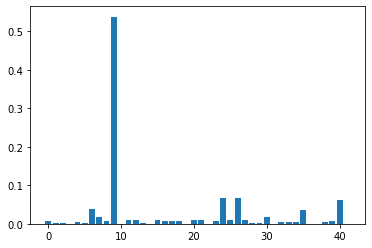

In [21]:
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Though the 41st feature has no score, we are not dropping it because in the correlation analysis, we saw that it has moderate correlation with the label. From this graph we can infer that the 9th feature ie, rate is most important wrt to label.


In [22]:
combine

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.000011,119,0,5,2,0,496,0,90909.090200,254,...,1,1,2,0,0,0,1,2,0,0
1,0.000008,119,0,5,2,0,1762,0,125000.000300,254,...,1,1,2,0,0,0,1,2,0,0
2,0.000005,119,0,5,2,0,1068,0,200000.005100,254,...,1,1,3,0,0,0,1,3,0,0
3,0.000006,119,0,5,2,0,900,0,166666.660800,254,...,2,1,3,0,0,0,2,3,0,0
4,0.000010,119,0,5,2,0,2126,0,100000.002500,254,...,2,1,3,0,0,0,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000009,119,2,5,2,0,114,0,111111.107200,254,...,24,13,24,0,0,0,24,24,0,1
257669,0.505762,113,0,4,10,8,620,354,33.612649,254,...,1,1,2,0,0,0,1,1,0,1
257670,0.000009,119,2,5,2,0,114,0,111111.107200,254,...,3,3,13,0,0,0,3,12,0,1
257671,0.000009,119,2,5,2,0,114,0,111111.107200,254,...,30,14,30,0,0,0,30,30,0,1


#Plot lables

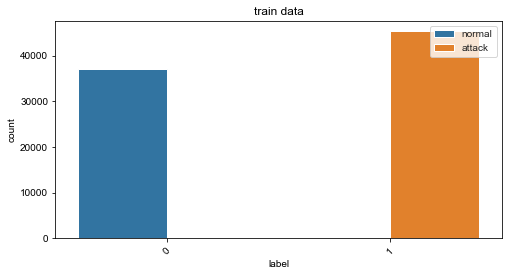

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

combine['label'].nunique()
def col_countplot(col, train_data=train):
    """
    This function plots countplot of a given feature for train dataset
    """
    fig, ax = plt.subplots(figsize=(8,4))
    sns.set_style('whitegrid')
    # countplot of the given column
    ax = sns.countplot(x=col, hue='label', data=train_data)
    ax.legend(loc="upper right", labels=('normal', 'attack'))
    ax.set_title("train data")
    plt.xticks(rotation=45)
    plt.show()
col_countplot('label')

**Since this is not an imbalanced data. We have taken it as it is. If it would have been an imbalanced data. We would have used sampling techniques like SMOTE(S ynthetic M inority O versampling Te chnique).**

Here, The count of unique values of labels are not varying largely, So, that is why we have considered it as a balanced data.


In [24]:
combine.shape

(257673, 43)

#Preprocessing : 

In [25]:
def removeHcorrFeature(percentage,X):
  # Selecting all the features with high correlation values with other features
  # Refer: https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/
  corr_matrix = X.corr().abs()

  # Select upper triangle of correlation matrix
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

  # Find index of feature columns with correlation greater than 0.9
  o_drop = [column for column in upper.columns if any(upper[column] > percentage)]
  print(o_drop)
  return o_drop

In [26]:
def applyPCA(X, n_com):
   #print(data_set)
   pca = PCA(n_components=n_com).fit(X)
   X_train_pca = pca.transform(X)
   print(pca.n_components_)
   return X_train_pca

**Appying PCA reduces the number of features to 29**

In [27]:
def applyMinMax(data):  
# scale features
  scaler = MinMaxScaler()
  model=scaler.fit(data)
  scaled_data=model.transform(data)
  return scaled_data
  #print(data_set)

In [28]:
def applyStandardScaler(data):
  scaler = StandardScaler()
  model = scaler.fit(data)
  scaled_data = model.transform(data)
  #print(data_set)
  return scaled_data

In [29]:
combine.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')

**Calling function and preparing the dataset**

**Minmax scaling**

In [30]:
X_mm=combine.drop(columns='label')    
y_mm=combine['label']
#Add min max scaler and return the dataset in pandas dataframe :
print("Apply MinMax scaler")
X_mm = applyMinMax(X_mm)


Apply MinMax scaler


**Standard scaling**

In [31]:
X_ss=combine.drop(columns='label')    
y_ss=combine['label']
#Add min max scaler and return the dataset in pandas dataframe :
print("Apply Standard scaler")
X_ss = applyStandardScaler(X_ss)

Apply Standard scaler


**Standard scaling + correlation**

In [32]:
X_ss_corr=combine.drop(columns='label')    
y_ss_corr=combine['label']
n_com=0.99
cols = X_ss_corr.columns
#Add min max scaler and return the dataset in pandas dataframe :
print("Apply MinMax scaler")
X_ss_corr = applyStandardScaler(X_ss_corr)
X_ss_corr = pd.DataFrame(X_ss_corr, columns =cols)
print("Remove highly correlated features with each other")
col = removeHcorrFeature(n_com, X_ss_corr)
print(col)
X_ss_corr.drop(X_ss_corr[col], axis=1, inplace=True)
X_ss_corr.shape

Apply MinMax scaler
Remove highly correlated features with each other
['sloss', 'dloss']
['sloss', 'dloss']


(257673, 40)

Observations: 2 columns have been pruned due to high correlation with other features, other than target.

**MinMax Scaling+ Correlation**

In [33]:
X_mm_corr=combine.drop(columns='label')    
y_mm_corr=combine['label']
n_com=0.99
cols = X_mm_corr.columns
#Add min max scaler and return the dataset in pandas dataframe :
print("Apply MinMax scaler")
X_mm_corr = applyMinMax(X_mm_corr)
X_mm_corr = pd.DataFrame(X_mm_corr, columns =cols)
print("Remove highly correlated features with each other")
col = removeHcorrFeature(n_com, X_mm_corr)
print(col)
X_mm_corr.drop(X_mm_corr[col], axis=1, inplace=True)
X_mm_corr.shape

Apply MinMax scaler
Remove highly correlated features with each other
['sloss', 'dloss']
['sloss', 'dloss']


(257673, 40)

If we keep correlation check for more than 95%, we will lose most of the data. So to optimize the we have taken percentage as 99. we can in correlation matrix here that : sloss, dloss are highly correlated to sbytes,dbytes repectively. So keeping one of those two column would reduce noise and also, the columns loss, dloss are not adding new information to the data. Hence, We will be dropping those when applying correlation analysis dropping 'sloss', 'dloss'

**Apply Standard scaler+PCA**

**We want to capture 99% of the variance of the dataset, and also reduced features so, applying PCA.**

In [34]:
from sklearn.decomposition import PCA
X_pca=combine.drop(columns='label')    
y_pca=combine['label']
n_com=0.99
cols = X_pca.columns
#Add min max scaler and return the dataset in pandas dataframe :
print("Apply Standard scaler")
X_pca = applyStandardScaler(X_pca)
X_pca = pd.DataFrame(X_pca, columns =cols)
X_pca = applyPCA(X_pca, n_com)
X_pca.shape

Apply Standard scaler
29


(257673, 29)

**OBSERVATION:**After apply PCA the features got reduces to 29. That means that 
number of features that captures 99% variance has been reduced to 29 from 42.

**Applying standard scaler is an important steps before applying PCA.**

**Note : 'X','X_pca','X_mm_corr','X_mm','X_ss','X_ss_corr.

X= the feature set before applying any preprocessing

X_pca= The feature set after applying Standard scaling and PCA.

X_mm_corr = The feature set after applying MinMax scaling and correlation analysis

X_mm= The feature set after applying MinMax scaling

X_ss= The feature set after applying standard scaling

X_ss_corr = The feature set after applying standard scaling and correaltion analysis.

y= the target set before applying any preprocessing

y_pca= The target set after applying Standard scaling and PCA.

y_mm_corr = The target set after applying MinMax scaling and correlation analysis

y_mm= The target set after applying MinMax scaling

y_ss= The target set after applying standard scaling

y_ss_corr = The target set after applying standard scaling and correaltion analysis.



# Train, Test different ML models and Result Analysis

In [35]:
def modelAnalysis(acc, f1, model, classifier_name):
  dataset1 = ['X','X_pca','X_mm_corr','X_mm','X_ss','X_ss_corr']
  j1=['y','y_pca','y_mm_corr','y_mm','y_ss','y_ss_corr']
  dataset = [X,X_pca,X_mm_corr,X_mm,X_ss,X_ss_corr]
  j=[y,y_pca,y_mm_corr,y_mm,y_ss,y_ss_corr]
  for i in range(0,len(dataset)): 
    start = time.process_time()
    print("X=",dataset1[i])
    print("y=",j1[i])
    X_train, X_test, y_train, y_test = train_test_split(dataset[i], j[i], test_size=0.3)
    model.fit(X_train, y_train)
    predicted_y = model.predict(X_test)
    print(metrics.classification_report(y_test, predicted_y))
    print(metrics.confusion_matrix(y_test, predicted_y))
    predicted_y_train = model.predict(X_train)
    print(accuracy_score(y_train, predicted_y_train))
    acc.append(accuracy_score(y_test, predicted_y))
    print(classifier_name+' model accuracy score: {0:0.4f}'. format(acc[-1]))
    f1.append(f1_score(y_test,predicted_y))
    print("f1_score:",f1[-1])
    print("Time taken to complete:")
    print(time.process_time() - start)
    #plot ROC curve
    metrics.plot_roc_curve(model, X_test, y_test)
    plt.title("ROC of"+classifier_name)
    plt.savefig(classifier_name+dataset1[i]+".png")  
    plt.show()


In [53]:
import matplotlib.pyplot as plt
list1 = ['X','X_pca','X_mm_corr','X_mm','X_ss','X_ss_corr']
def displayAnalysisGraphs(list1, acc,f1,model):
  plt.bar(list1,acc,width = 0.4)
  for i in range(len(list1)):
    acc[i]=float('{:,.3f}'.format(acc[i]))
    plt.annotate(str(acc[i]), xy=(list1[i], acc[i]))
  plt.ylabel("Accuracy")
  plt.title("Accuracy for dataset after different preprocessing techniques for "+model)
  plt.savefig("Accuracy"+model+".png")
  plt.show()
  plt.bar(list1,f1,width = 0.4)
  for i in range(len(list1)):
    f1[i]=float('{:,.3f}'.format(f1[i]))
    plt.annotate(str(f1[i]), xy=(list1[i], f1[i]))
  plt.ylabel("F1 score")
  plt.title("F1 scores for dataset after different preprocessing techniques for "+model)
  plt.savefig("F1_scores"+model+".png")
  plt.show()

# XGBoost


In [44]:
import sys

In [45]:
!{sys.executable} -m pip install xgboost

In [47]:
from sklearn.model_selection import train_test_split
# import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
# check accuracy score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
from sklearn.metrics import f1_score
import time

X= X
y= y
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     27786
           1       0.95      0.95      0.95     49516

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25346  2440]
 [ 2626 46890]]
0.9339916061894651
XGBoost model accuracy score: 0.9345
f1_score: 0.9487485583635149
Time taken to complete:
23.402400054000054


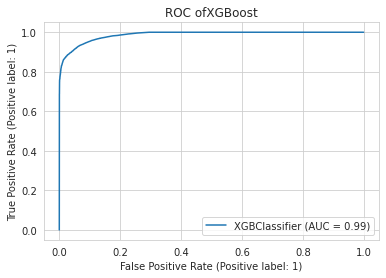

X= X_pca
y= y_pca
              precision    recall  f1-score   support

           0       0.93      0.80      0.86     28084
           1       0.89      0.97      0.93     49218

    accuracy                           0.90     77302
   macro avg       0.91      0.88      0.89     77302
weighted avg       0.91      0.90      0.90     77302

[[22392  5692]
 [ 1693 47525]]
0.9069861563111586
XGBoost model accuracy score: 0.9045
f1_score: 0.9279055010494459
Time taken to complete:
32.68730744599998


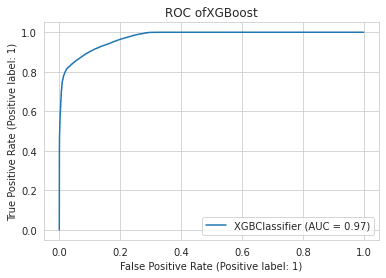

X= X_mm_corr
y= y_mm_corr
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     27846
           1       0.95      0.94      0.95     49456

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25388  2458]
 [ 2739 46717]]
0.9334094726979393
XGBoost model accuracy score: 0.9328
f1_score: 0.9473086554937088
Time taken to complete:
22.41249678500003


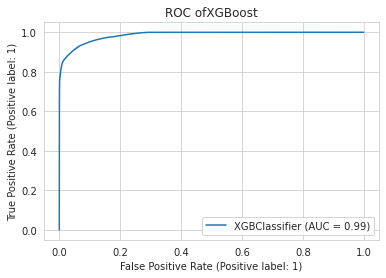

X= X_mm
y= y_mm
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     27667
           1       0.95      0.95      0.95     49635

    accuracy                           0.94     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.94      0.94      0.94     77302

[[25236  2431]
 [ 2551 47084]]
0.9327053683796176
XGBoost model accuracy score: 0.9356
f1_score: 0.9497528996469995
Time taken to complete:
23.13760074400011


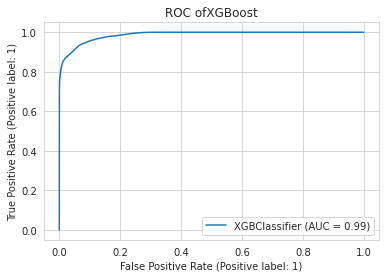

X= X_ss
y= y_ss
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     28059
           1       0.95      0.95      0.95     49243

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25534  2525]
 [ 2606 46637]]
0.9343464304128712
XGBoost model accuracy score: 0.9336
f1_score: 0.947858340531477
Time taken to complete:
22.84240630399995


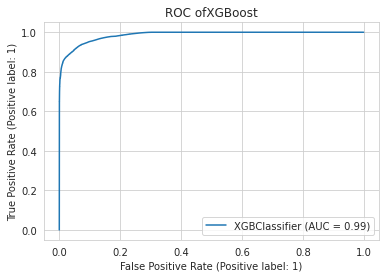

X= X_ss_corr
y= y_ss_corr
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     28067
           1       0.95      0.95      0.95     49235

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25449  2618]
 [ 2615 46620]]
0.9337088556364382
XGBoost model accuracy score: 0.9323
f1_score: 0.9468585297492713
Time taken to complete:
22.098914340999954


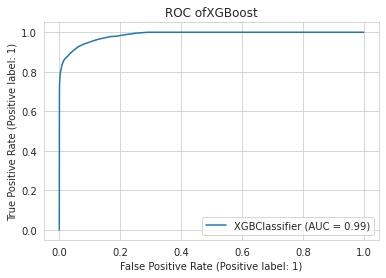

In [67]:
acc_xgb=[]
f1_xgb=[]
model = XGBClassifier()
modelAnalysis(acc_xgb,f1_xgb, model,"XGBoost")

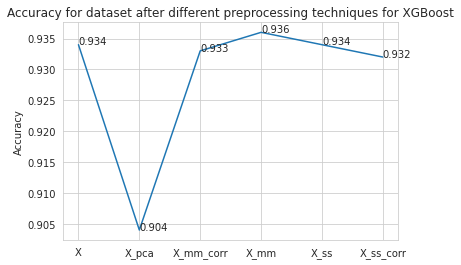

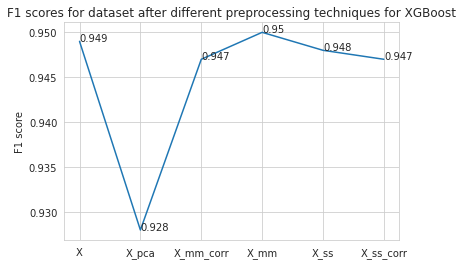

In [76]:
displayAnalysisGraphs(list1, acc_xgb,f1_xgb,"XGBoost")

**OBSERVATION: The best accuracy for XGBoost is for Standard scaling and correlation analysis. The F1 score is also good for the same**

1)F1 SCORE  decreased with applying PCA, acuracy is also less.

2)If we see for the rest of the cases the accuracy is 93%.

3)The maximum time for fitting PCA data and predicting is high as compared to fitting data after applying other preprocessing technique. 

# GB Gradient

X= X
y= y
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     27777
           1       0.94      0.95      0.95     49525

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[24915  2862]
 [ 2270 47255]]
0.9337199438934197
GB Gradient model accuracy score: 0.9336
f1_score: 0.9484956142991912
Time taken to complete:
122.37918699999994


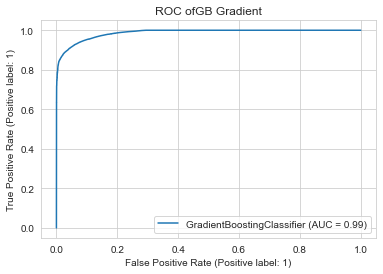

X= X_pca
y= y_pca
              precision    recall  f1-score   support

           0       0.92      0.81      0.86     27852
           1       0.90      0.96      0.93     49450

    accuracy                           0.91     77302
   macro avg       0.91      0.89      0.90     77302
weighted avg       0.91      0.91      0.91     77302

[[22560  5292]
 [ 1856 47594]]
0.9094200287185856
GB Gradient model accuracy score: 0.9075
f1_score: 0.9301516572858036
Time taken to complete:
241.70412799999997


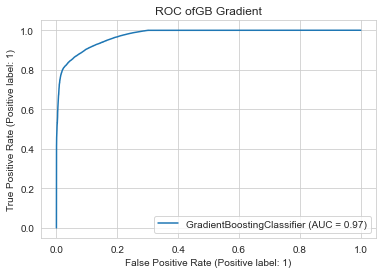

X= X_mm_corr
y= y_mm_corr
              precision    recall  f1-score   support

           0       0.91      0.90      0.91     27808
           1       0.95      0.95      0.95     49494

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25069  2739]
 [ 2407 47087]]
0.9337809293068177
GB Gradient model accuracy score: 0.9334
f1_score: 0.9481876761981474
Time taken to complete:
108.16531199999997


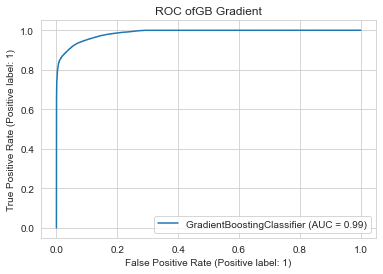

X= X_mm
y= y_mm
              precision    recall  f1-score   support

           0       0.91      0.90      0.90     27873
           1       0.94      0.95      0.95     49429

    accuracy                           0.93     77302
   macro avg       0.93      0.92      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25064  2809]
 [ 2480 46949]]
0.9344850336251393
GB Gradient model accuracy score: 0.9316
f1_score: 0.9466764797806164
Time taken to complete:
133.06465500000002


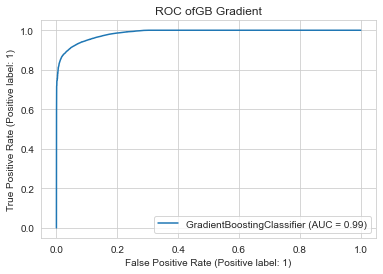

X= X_ss
y= y_ss
              precision    recall  f1-score   support

           0       0.91      0.90      0.91     28021
           1       0.94      0.95      0.95     49281

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25284  2737]
 [ 2419 46862]]
0.9334039285694485
GB Gradient model accuracy score: 0.9333
f1_score: 0.9478559870550163
Time taken to complete:
141.04384100000016


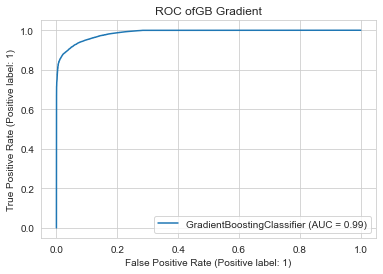

X= X_ss_corr
y= y_ss_corr
              precision    recall  f1-score   support

           0       0.91      0.90      0.91     27767
           1       0.94      0.95      0.95     49535

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[24971  2796]
 [ 2405 47130]]
0.9339638855470115
GB Gradient model accuracy score: 0.9327
f1_score: 0.9477081469118549
Time taken to complete:
115.7248669999999


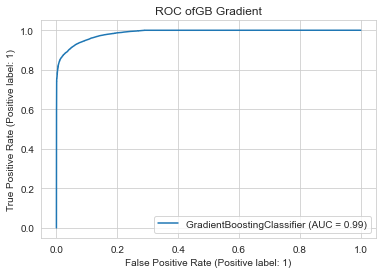

In [55]:
acc_gb=[]
f1_gb=[]
model = GradientBoostingClassifier()
modelAnalysis(acc_gb,f1_gb, model,"GB Gradient")

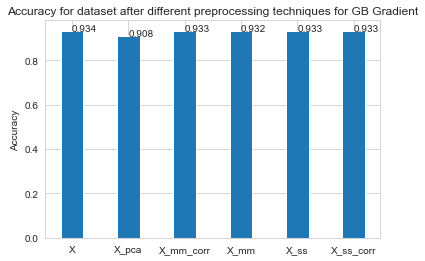

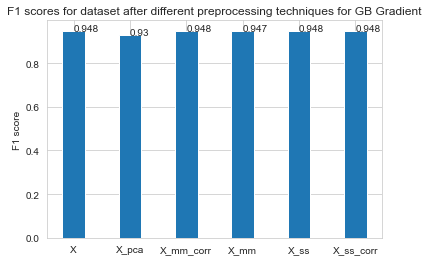

In [56]:
displayAnalysisGraphs(list1,acc_gb,f1_gb,"GB Gradient")

1)Time take to fit and predict using PCA preprocessing is high as compared to other models build from differnt preprocessing techniques.
2)Here the standard scaling and correlation, minmax scaling and standard scaling preprocessing steps yeilds the same result for the model.
3)For X_PCA:GB tree, F1 score is high than accuracy score.




# Decision Tree

X= X
y= y
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     27855
           1       0.95      0.95      0.95     49447

    accuracy                           0.94     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.94      0.94      0.94     77302

[[25395  2460]
 [ 2530 46917]]
0.9978544222740906
Decision Tree model accuracy score: 0.9354
f1_score: 0.9495061928276533
Time taken to complete:
4.057676000000129


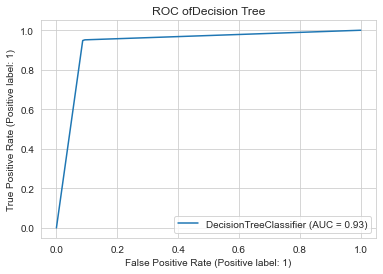

X= X_pca
y= y_pca
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     28082
           1       0.93      0.93      0.93     49220

    accuracy                           0.91     77302
   macro avg       0.91      0.91      0.91     77302
weighted avg       0.91      0.91      0.91     77302

[[24741  3341]
 [ 3404 45816]]
0.997749083832767
Decision Tree model accuracy score: 0.9127
f1_score: 0.9314372261809162
Time taken to complete:
12.195110999999997


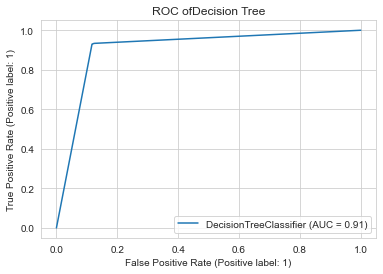

X= X_mm_corr
y= y_mm_corr
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     27948
           1       0.95      0.95      0.95     49354

    accuracy                           0.94     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.94      0.94      0.94     77302

[[25494  2454]
 [ 2412 46942]]
0.9976770101623875
Decision Tree model accuracy score: 0.9371
f1_score: 0.9507240506329113
Time taken to complete:
3.6552379999998266


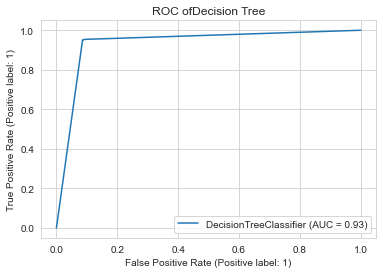

X= X_mm
y= y_mm
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     27883
           1       0.95      0.95      0.95     49419

    accuracy                           0.94     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.94      0.94      0.94     77302

[[25489  2394]
 [ 2507 46912]]
0.9978433340171092
Decision Tree model accuracy score: 0.9366
f1_score: 0.9503570524183337
Time taken to complete:
4.520661000000018


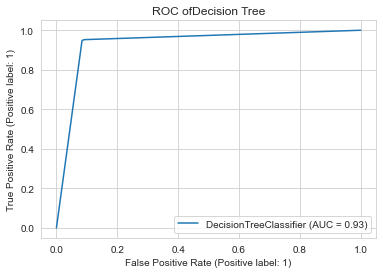

X= X_ss
y= y_ss
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     28037
           1       0.95      0.95      0.95     49265

    accuracy                           0.94     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.94      0.94      0.94     77302

[[25573  2464]
 [ 2531 46734]]
0.997826701631637
Decision Tree model accuracy score: 0.9354
f1_score: 0.9492702842692178
Time taken to complete:
4.079705999999987


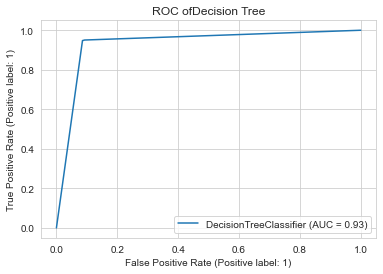

X= X_ss_corr
y= y_ss_corr
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     27963
           1       0.95      0.95      0.95     49339

    accuracy                           0.94     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.94      0.94      0.94     77302

[[25567  2396]
 [ 2479 46860]]
0.997665921905406
Decision Tree model accuracy score: 0.9369
f1_score: 0.9505553019930015
Time taken to complete:
3.723180000000184


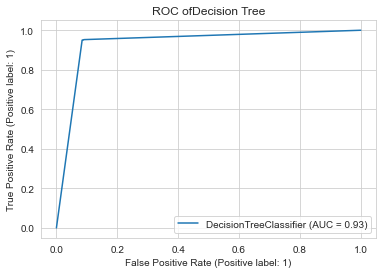

In [57]:
acc_dt=[]
f1_dt=[]
model = DecisionTreeClassifier()
modelAnalysis(acc_dt,f1_dt, model,"Decision Tree")

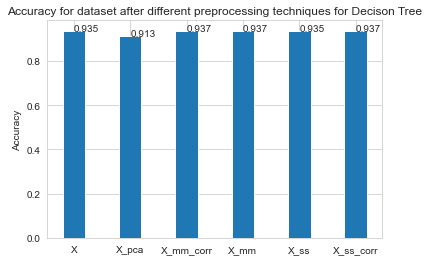

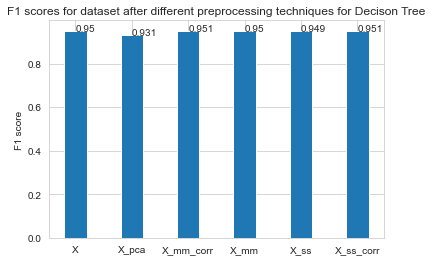

In [58]:
displayAnalysisGraphs(list1,acc_dt,f1_dt,"Decison Tree")

1)The time taken to fit and predict the data after applying standard scaling and correaltion analysis is high.

2)The accuracy and F1 score is highest in the X_ss.




# Random Forest

For more work, go to : CMPE255Project/5.ML_Models/baseline/RandomForest.ipynb

X= X
y= y
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     27940
           1       0.96      0.96      0.96     49362

    accuracy                           0.95     77302
   macro avg       0.95      0.95      0.95     77302
weighted avg       0.95      0.95      0.95     77302

[[26175  1765]
 [ 2034 47328]]
0.9978987753020164
Random Forest model accuracy score: 0.9509
f1_score: 0.9614138438880707
Time taken to complete:
45.84577399999999


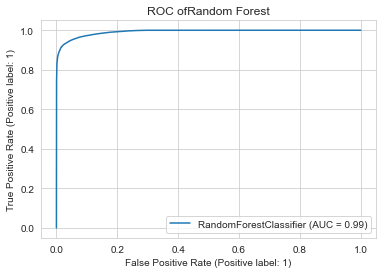

X= X_pca
y= y_pca
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     28036
           1       0.94      0.95      0.94     49266

    accuracy                           0.93     77302
   macro avg       0.92      0.92      0.92     77302
weighted avg       0.93      0.93      0.93     77302

[[25034  3002]
 [ 2583 46683]]
0.9976770101623875
Random Forest model accuracy score: 0.9278
f1_score: 0.9435579226081596
Time taken to complete:
148.81260199999997


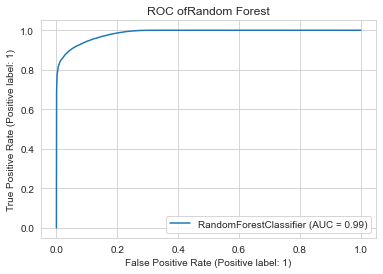

X= X_mm_corr
y= y_mm_corr
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     27882
           1       0.96      0.96      0.96     49420

    accuracy                           0.95     77302
   macro avg       0.95      0.95      0.95     77302
weighted avg       0.95      0.95      0.95     77302

[[25929  1953]
 [ 1924 47496]]
0.9975661275925731
Random Forest model accuracy score: 0.9498
f1_score: 0.9607864952614065
Time taken to complete:
53.03533200000001


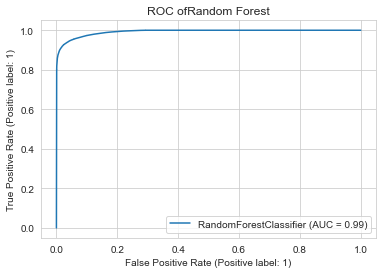

X= X_mm
y= y_mm
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     27824
           1       0.96      0.96      0.96     49478

    accuracy                           0.95     77302
   macro avg       0.95      0.95      0.95     77302
weighted avg       0.95      0.95      0.95     77302

[[26068  1756]
 [ 2070 47408]]
0.9972612005255834
Random Forest model accuracy score: 0.9505
f1_score: 0.9612132762920461
Time taken to complete:
50.540430000000015


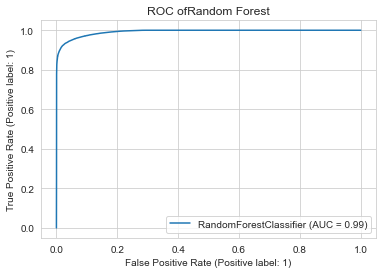

X= X_ss
y= y_ss
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     27798
           1       0.96      0.96      0.96     49504

    accuracy                           0.95     77302
   macro avg       0.95      0.95      0.95     77302
weighted avg       0.95      0.95      0.95     77302

[[26005  1793]
 [ 1999 47505]]
0.9977324514472947
Random Forest model accuracy score: 0.9509
f1_score: 0.9616202101172041
Time taken to complete:
51.08752399999997


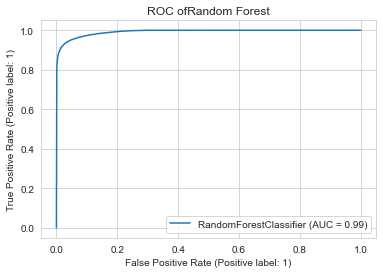

X= X_ss_corr
y= y_ss_corr
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     28045
           1       0.96      0.96      0.96     49257

    accuracy                           0.95     77302
   macro avg       0.94      0.95      0.95     77302
weighted avg       0.95      0.95      0.95     77302

[[26173  1872]
 [ 2043 47214]]
0.9978100692461649
Random Forest model accuracy score: 0.9494
f1_score: 0.9601903541685733
Time taken to complete:
49.25416799999999


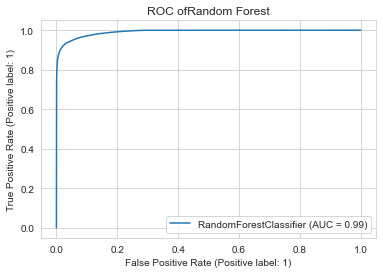

In [48]:
acc_rf=[]
f1_rf=[]
model = RandomForestClassifier()
modelAnalysis(acc_rf,f1_rf, model,"Random Forest")

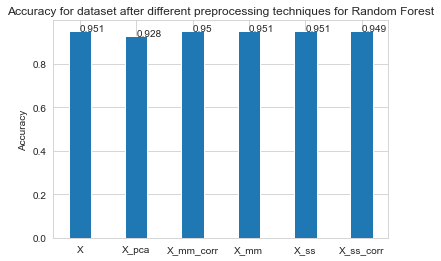

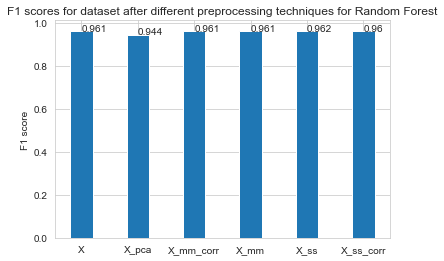

In [54]:
displayAnalysisGraphs(list1, acc_rf,f1_rf,"Random Forest")

1)The random forest classifier has maximum and similar accuracy on X_mm,X_ss,X_mm_corr,X_ss_corr.

2) The overall accuracy and F1 score is less for PCA.

3) The Time taken to fit and predict  the  model for the data :X_ss_corr is the highest.

##Visualize performance of different ML models for different Pre-Processing techniques

In [60]:
def displayComparisonGraphsOfModels(index, typeOfPreprocessing):
  acc = [acc_rf[index], acc_gb[index], acc_dt[index], acc_xgb[index]]
  list1=["XGB","GB","DT","RT"]
  
  plt.bar(list1,acc, width=0.2)
  for i in range(len(list1)):
    acc[i]=float('{:,.3f}'.format(acc[i]))
    plt.annotate(str(acc[i]), xy=(list1[i], acc[i]))
  plt.title("Accuracy comparison between different ML models "+typeOfPreprocessing)
  plt.ylabel("Accuracy")
  plt.xlabel("ML Model")
  plt.savefig("Accuracy_"+typeOfPreprocessing+".png")
  plt.show()


**WITHOUT ANY PREPROCESSING**

In [61]:
displayComparisonGraphsOfModels(0,"Without_preprocessing")

NameError: name 'acc_xgb' is not defined

The accuracy for XGB classiffier works best after fitting the data without any preprocessing.

**WITH PCA AND STANDARD SCALER**

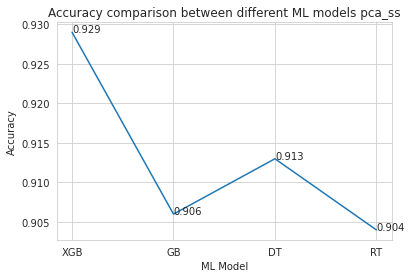

In [84]:
displayComparisonGraphsOfModels(1,"pca_ss")


The accuracy for XGB classifier works best after fitting the data with preprocessing by applying PCA and standard scaler.However, we can see the accuracy has reduced from the previous case.



**WITH REMOVING CORRELATION (AMONG FEATURES) AND MINMAX SCALING**

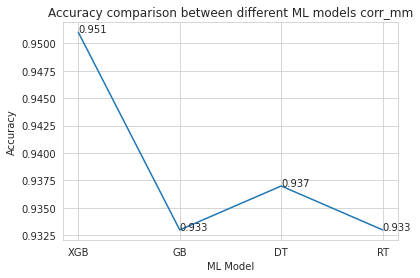

In [85]:
displayComparisonGraphsOfModels(2,"corr_mm")

The accuracy for XGB classifier works best after fitting the data with preprocessing by applying Correlation analysis and MinMax scaling.We can see the accuracy has increased from the previous case.


**WITH MINMAX SCALING**



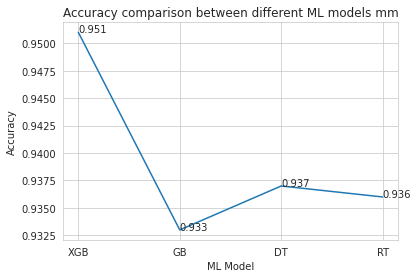

In [86]:
displayComparisonGraphsOfModels(3,"mm")

**WITH STANDARD SCALING**


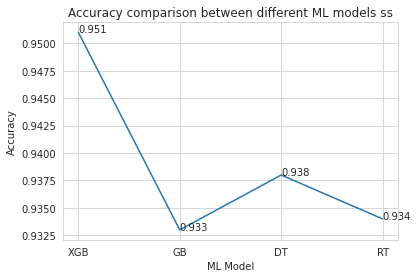

In [87]:
displayComparisonGraphsOfModels(4,"ss")

**WITH STANDARD SCALING AND CORRELATION**

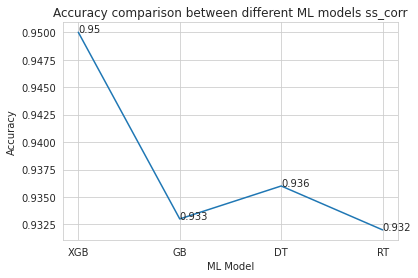

In [88]:
displayComparisonGraphsOfModels(5,"ss_corr")




---





In [89]:
list1=["XGB","GB","DT","RT"]
df = pd.DataFrame(list1, columns=['Model'])
df['accuracy_without_preprocessing'] = [acc_rf[0], acc_gb[0], acc_dt[0], acc_xgb[0]]
df['accuracy_with_pca_standardscaler'] = [acc_rf[1], acc_gb[1], acc_dt[1], acc_xgb[1]]
df['accuracy_with_minmax_correlation'] = [acc_rf[2], acc_gb[2], acc_dt[2], acc_xgb[2]]
df['accuracy_with_minmax'] = [acc_rf[3], acc_gb[3], acc_dt[3], acc_xgb[3]]
df['accuracy_with_standardscaler'] = [acc_rf[4], acc_gb[4], acc_dt[4], acc_xgb[4]]
df['accuracy_with_standardscaler_correlation'] = [acc_rf[5], acc_gb[5], acc_dt[5], acc_xgb[5]]

In [90]:
df

,Model,accuracy_without_preprocessing,accuracy_with_pca_standardscaler,accuracy_with_minmax_correlation,accuracy_with_minmax,accuracy_with_standardscaler,accuracy_with_standardscaler_correlation
0,XGB,0.950,0.929,0.951,0.951,0.951,0.950
1,GB,0.933,0.906,0.933,0.933,0.933,0.933
2,DT,0.936,0.913,0.937,0.937,0.938,0.936
3,RT,0.934,0.904,0.933,0.936,0.934,0.932


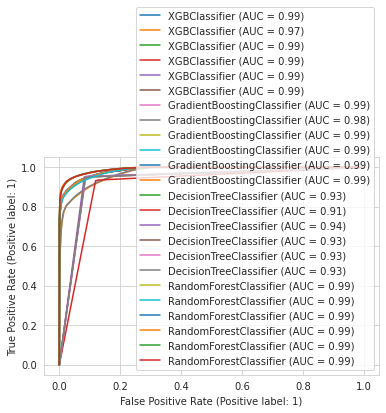

In [95]:
from sklearn.metrics import plot_roc_curve

model_XGB = xgb.XGBClassifier()
model_GB = GradientBoostingClassifier()
model_DT = DecisionTreeClassifier()
model_RF = RandomForestClassifier()

dataset = [X,X_pca,X_mm_corr,X_mm,X_ss,X_ss_corr]
label=[y,y_pca,y_mm_corr,y_mm,y_ss,y_ss_corr]
classifiers = [model_XGB, model_GB, model_DT,model_RF]
ax = plt.gca()
for model in classifiers:
    for j in range(0,len(list1)):
      X_train, X_test, y_train, y_test = train_test_split(dataset[j], label[j], test_size=0.3)
      model.fit(X_train,y_train)
      plot_roc_curve(model, X_test, y_test, ax=ax)

   
